In [195]:
import pandas as pd

In [196]:
import matplotlib.pyplot as plt

In [197]:
train = pd.read_csv("train.csv")

In [198]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [199]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### dropping the column Cabin because it has too many null values:

In [201]:
train = train.drop("Cabin", axis=1)

### dropping useless columns:

In [202]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [203]:
import seaborn as sns

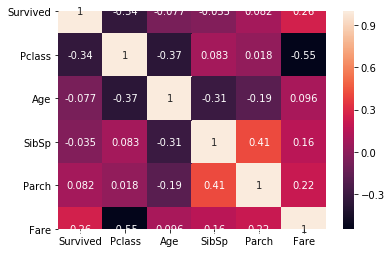

In [204]:
sns.heatmap(train.corr(), annot=True)

# fillling null values of Age and Embarked columns

In [205]:
mean_age = train['Age'].mean()

In [206]:
x = train[train['Age'].isnull()].index.values

for i in x:
    train.loc[i,'Age'] = mean_age

In [207]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [208]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [209]:
train['Embarked'].fillna(value="S", inplace=True)

In [210]:
train['Gender'] = 0

males = train.loc[train['Sex'] == "male"].index

females = train.loc[train['Sex'] == "female"].index

for i in males:
    train.loc[i,'Gender'] = 0

for i in females:
    train.loc[i,'Gender'] = 1

In [211]:
train = train.drop(["Sex"], axis=1)

In [212]:
train['FareBand'] = 0

In [213]:
zero_index = train.loc[(train['Fare'] >= 0) & (train['Fare'] <= 7.91)].index

In [214]:
one_index = train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454)].index
two_index = train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31)].index
three_index = train.loc[train['Fare'] > 31].index
#train[(train['Fare'] > 14.454) & (train['Fare'] <= 31)]['FareBand'] = 2
#train[train['Fare'] > 31]['FareBand'] = 3

In [215]:
for i in zero_index:
    train.loc[i,'FareBand'] = 0

for i in one_index:
    train.loc[i,'FareBand'] = 1
    
for i in two_index:
    train.loc[i,'FareBand'] = 2
    
for i in three_index:
    train.loc[i,'FareBand'] = 3

In [216]:
train = train.drop("Fare", axis=1)

In [217]:
train.loc[ train['Age'] <= 16, 'Age'] = 0


In [218]:
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']= 4

In [219]:
train.loc[ train['Embarked']== "S", 'Embarked']= 1

In [220]:
train.loc[ train['Embarked']== "C", 'Embarked']= 2

In [221]:
train.loc[ train['Embarked']== "Q", 'Embarked']= 0

In [222]:
X = train[["Pclass", "Age", "SibSp", "Parch","Embarked", "Gender", "FareBand"]]

In [223]:
Y = train["Survived"]

In [289]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [290]:
param_grid = {'min_samples_leaf':np.arange(20,40,10),
              'min_samples_split':np.arange(20,40,10),
              'max_depth':np.arange(4,7),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini']}

In [291]:
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')

In [292]:
tree_search.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': array([4, 5, 6

In [293]:
tree_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0}

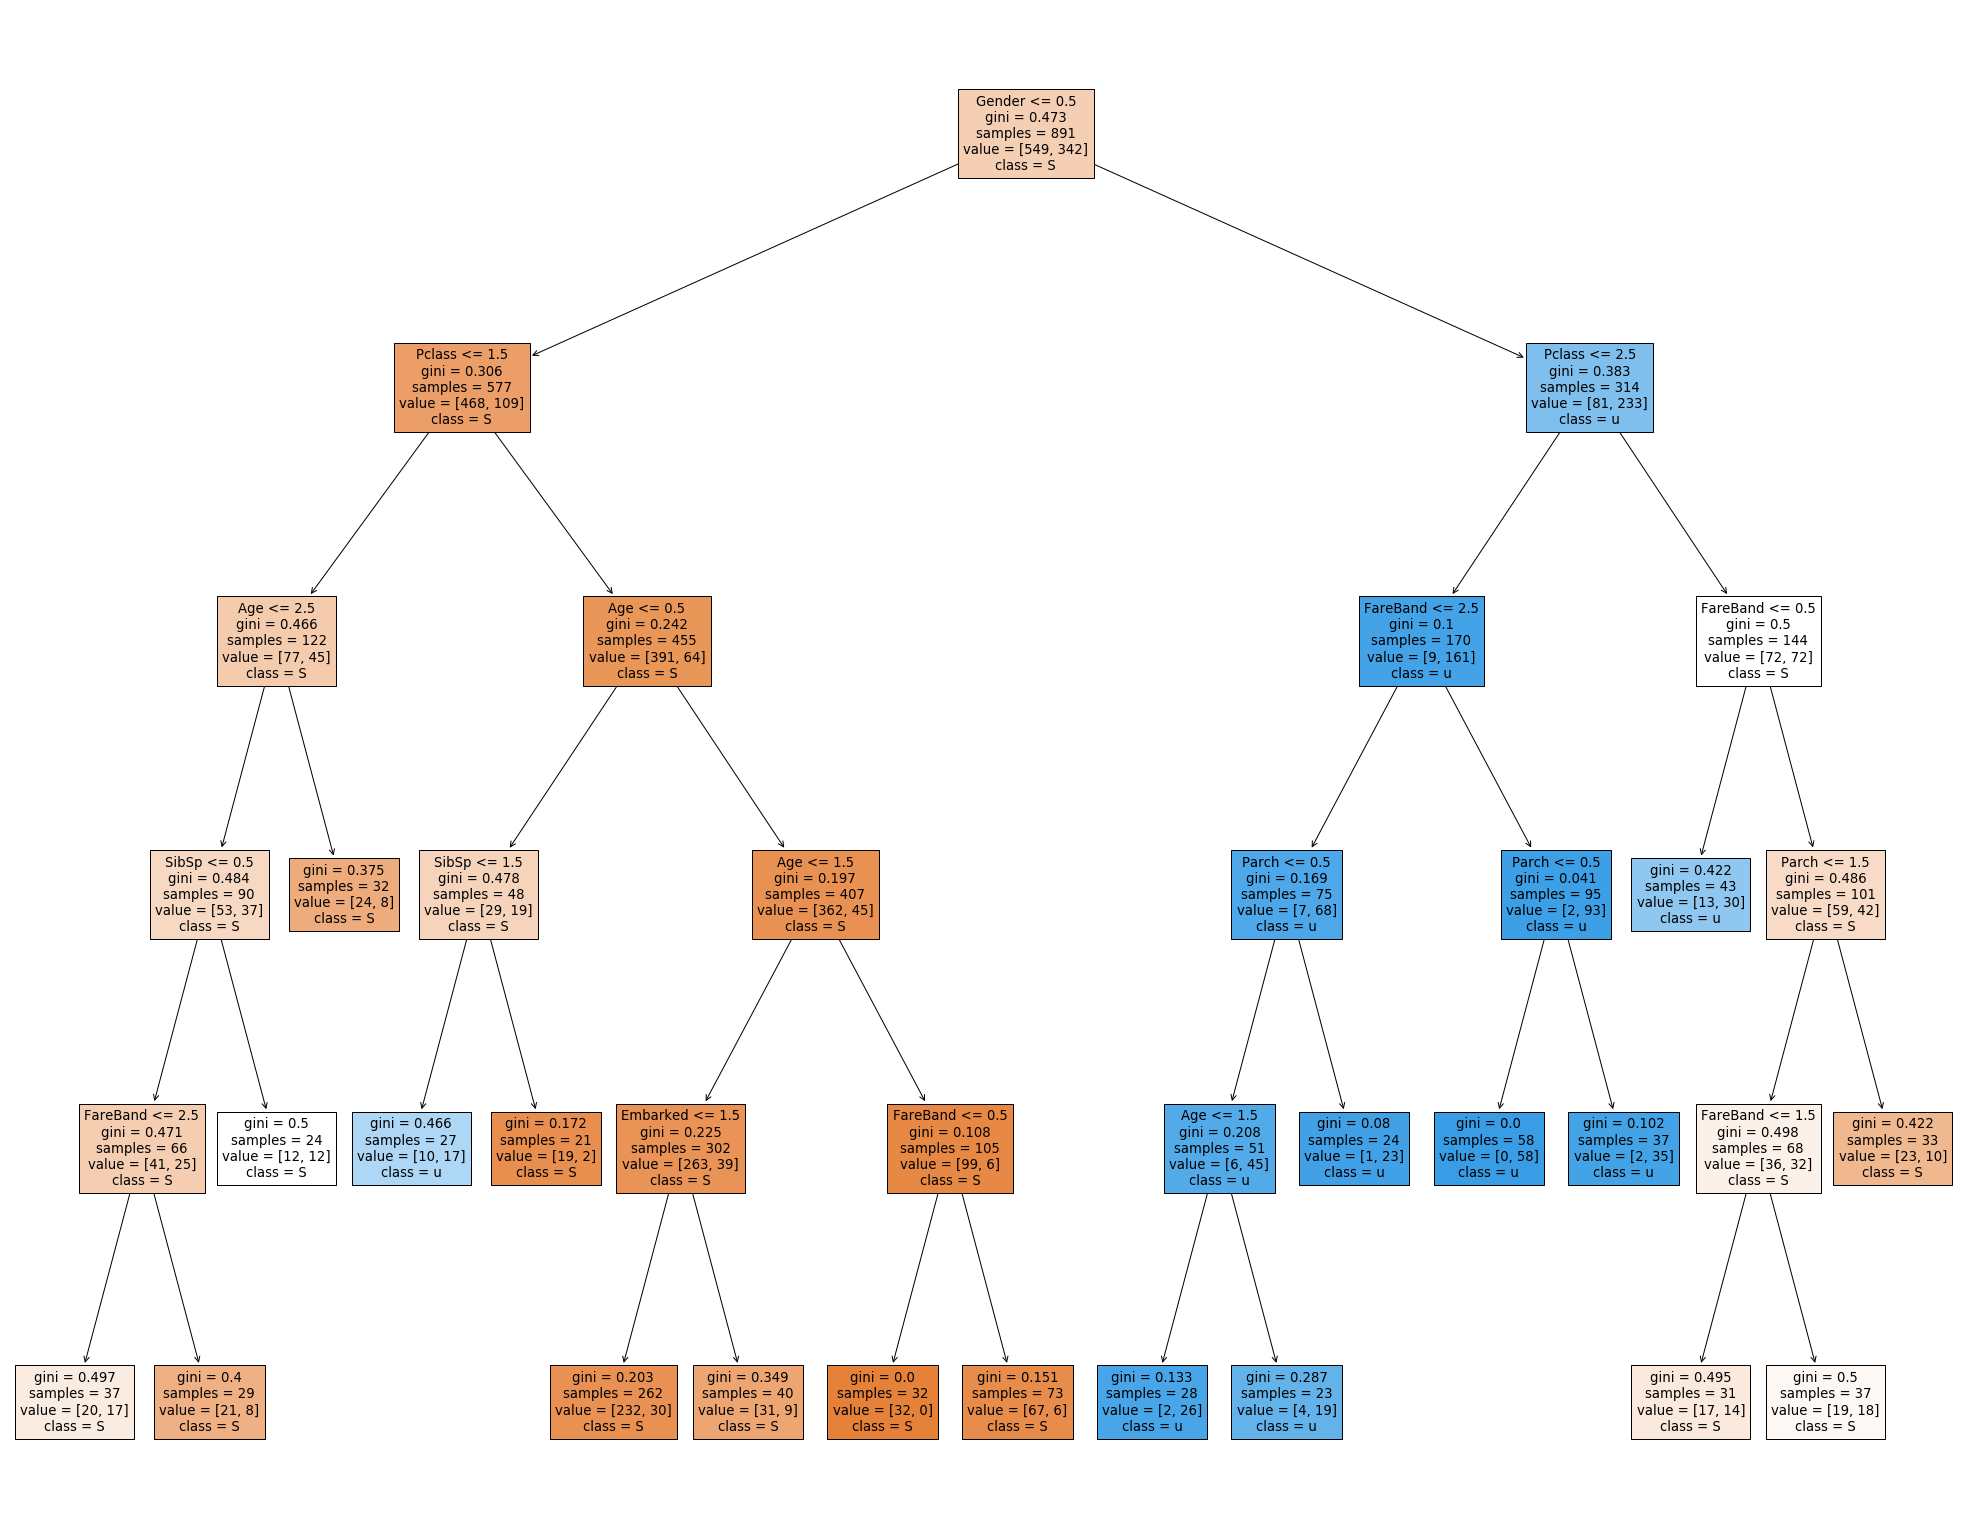

In [313]:
dt = tree.DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 20, min_samples_split= 20, max_depth=5)

dt.fit(X, Y)

from sklearn import tree

fig = plt.figure(figsize=(35,28))
tree.plot_tree(dt, feature_names=X.columns, class_names="Survived", filled=True)
#plt.tight_layout()
plt.savefig("DecisionTree.png")
plt.show()

In [296]:
from sklearn.model_selection import cross_val_score

In [297]:
scores = cross_val_score(dt, X, Y, cv=5)

In [298]:
scores

array([0.76536313, 0.76966292, 0.79213483, 0.78651685, 0.79213483])

In [281]:
scores.mean()

0.7811625133387734

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
rf = RandomForestClassifier()

In [308]:
scores = cross_val_score(rf, X, Y, cv=5)

In [309]:
scores

array([0.78212291, 0.79213483, 0.80337079, 0.80337079, 0.84269663])

In [310]:
scores.mean()

0.8047391877471597